# Simple Linear Regression

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [ ]:
df = pd.read_csv("Salary_Data.csv")

### Importing the dataset

In [ ]:
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

### Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [ ]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

### Visualising the Training set results

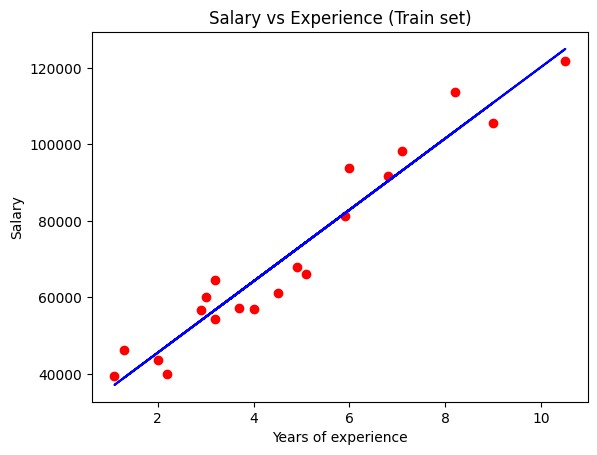

In [ ]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

### Visualising the Test set results

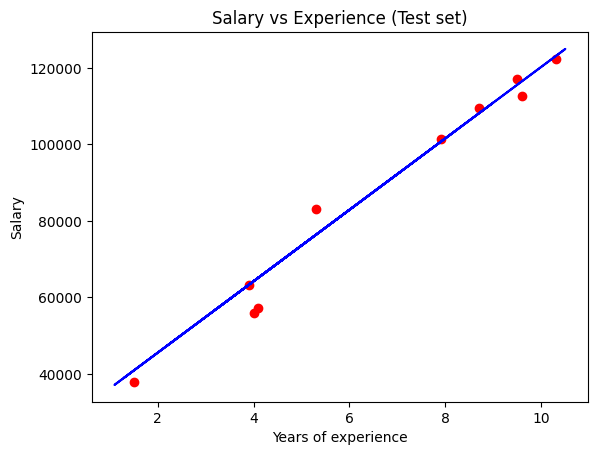

In [ ]:
plt.scatter(X_test,y_test, color='red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

### Making a single prediction (for example the salary of an employee with 12 years of experience)

In [ ]:
print(regressor.predict([[12]]))

[138967.5015615]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

### Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031183


$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

# Pytorch implementation

### Importing libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### loading dataset

In [1]:
data = pd.read_csv("Salary_Data.csv")
X = torch.tensor((data.iloc[: , :-1].values), dtype=torch.float32)
y = torch.tensor((data.iloc[: , -1].values), dtype=torch.float32)

NameError: name 'pd' is not defined

# train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# building PyTorch model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

### Instantiate the model

In [ ]:
input_size = 1  # One feature in the input (X)
output_size = 1  # One output (predicted y)
model = LinearRegressionModel(input_size, output_size)

# Loss function and optimizer

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
for epoch in range(epochs):
  # training model
  y_pred = model(X_train)
  # Calcualting loss
  loss = loss_fn(y_pred, y_test)
  # Zero grad
  optimizer.zero_grad()
  # back propogation
  loss.backward()
  # optimizer step
  optimizer.step()

  # print what's happening
  if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 2369392640.0000
Epoch [20/100], Loss: 2269502464.0000
Epoch [30/100], Loss: 2177374464.0000
Epoch [40/100], Loss: 2092405376.0000
Epoch [50/100], Loss: 2014039424.0000
Epoch [60/100], Loss: 1941762560.0000
Epoch [70/100], Loss: 1875102336.0000
Epoch [80/100], Loss: 1813622144.0000
Epoch [90/100], Loss: 1756919680.0000
Epoch [100/100], Loss: 1704623232.0000


# Plot the original data and the regression line

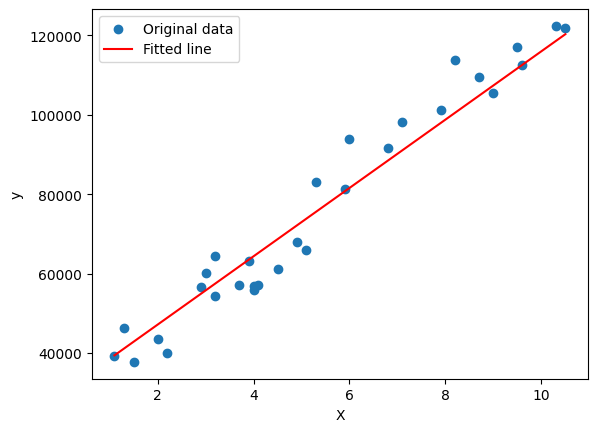

In [ ]:
predicted = model(X).detach().numpy()

plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, label='Fitted line', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
with torch.no_grad():
    y_test_pred = model(X_test)

print(y_test_pred)

tensor([[ 42825.8945],
        [118583.9766],
        [ 65208.9648],
        [ 63487.1914],
        [111696.8828],
        [104809.7812]])


In [ ]:
print(y_test)

tensor([ 37731., 122391.,  57081.,  63218., 116969., 109431.])


In [ ]:
# Make prediction for experience of 12 years
data = torch.tensor([[12.0]])
# Set the model to evaluation mode
model.eval()
with torch.no_grad():
    y_test_pred = model(data)

print(y_test_pred)

tensor([[133219.0625]])
